In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("/workspace/DeepLearningFundamentals/Dokumanlar/02_MachineLearning/data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
y= df_clean["Outcome"].values
X= df_clean.drop("Outcome",axis=1)

NameError: name 'df_clean' is not defined

In [6]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    return df[~((df<Lower_tail) | (df>Upper_tail)).any(axis=1)]
df_clean = iqr_outliers(df)

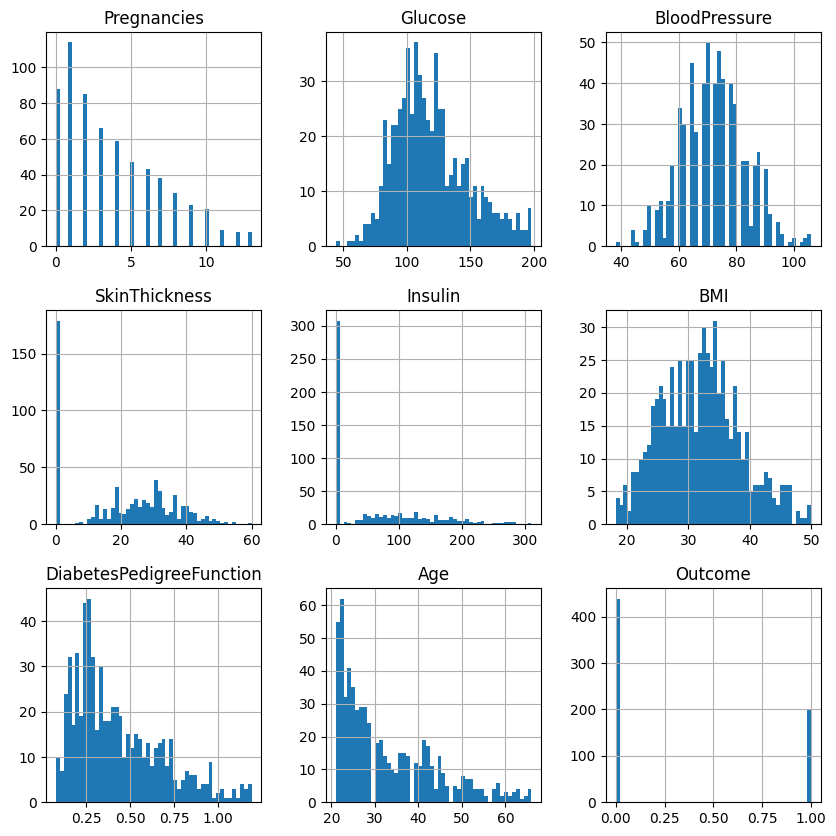

In [7]:
df_clean.hist(figsize=(10,10),bins=50);

In [8]:
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000
mean,3.807512,119.112676,72.139280,20.575900,65.433490,32.010016,0.429923,32.748044,0.312989
std,3.262142,29.162175,11.338522,15.348515,78.982766,6.434129,0.250835,11.100738,0.464073
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,37.000000,32.000000,0.361000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,35.950000,0.586500,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,310.000000,50.000000,1.191000,66.000000,1.000000


In [9]:
y= df_clean["Outcome"].values
X= df_clean.drop("Outcome",axis=1)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled =  sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(2,input_shape=(3,),activation="relu"))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

model.fit(X,y,epochs=150,batch_size=10)

Epoch 1/150


ValueError: in user code:

    File "/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/keras/src/engine/training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_13" is incompatible with the layer: expected shape=(None, 3), found shape=(None, 8)
